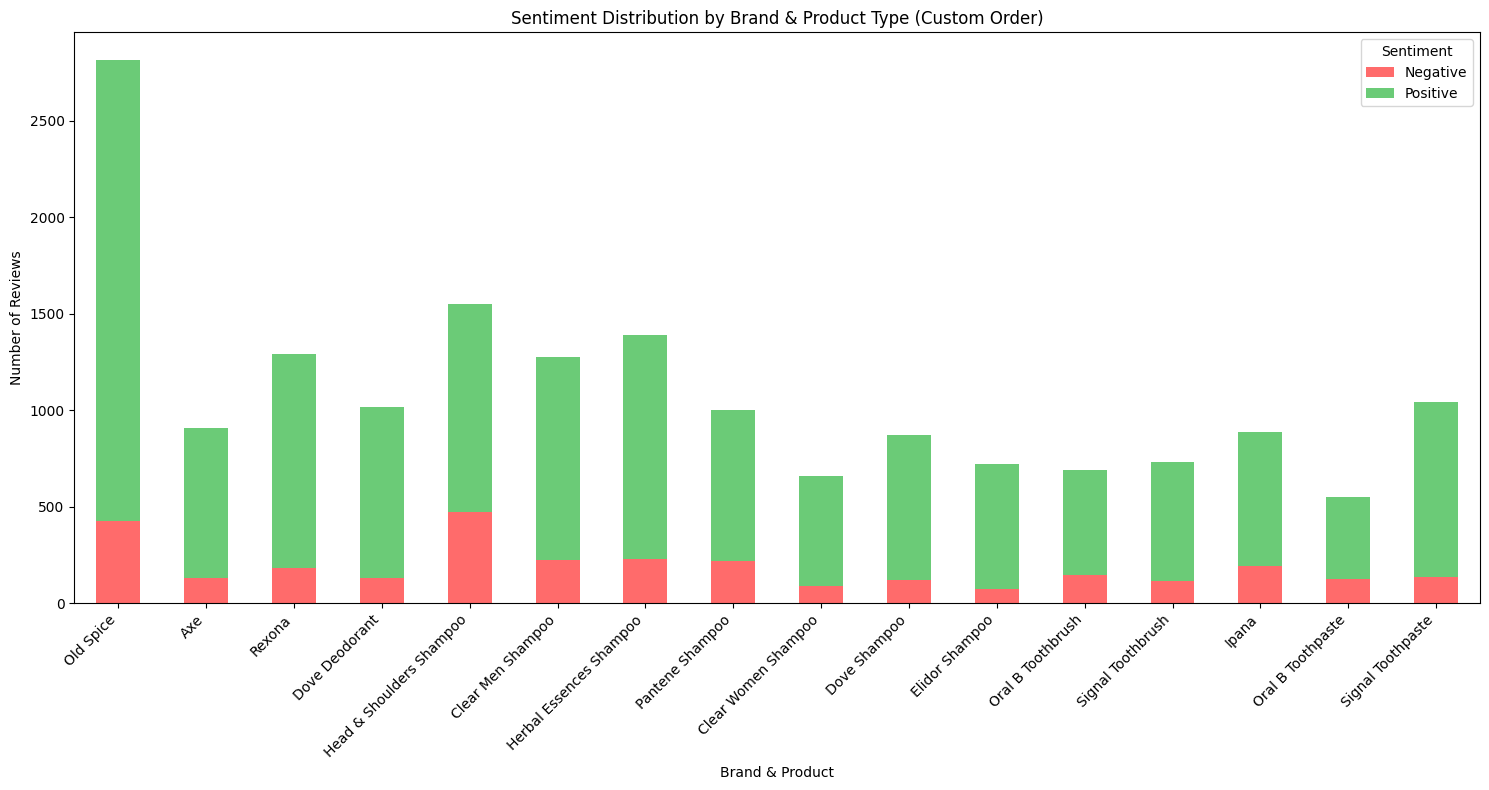

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


file_path = "/content/drive/MyDrive/wifo dosyalar/finalfinal_reviews.csv"
df = pd.read_csv(file_path, encoding="utf-8")

df["label_custom_model"] = df["label_custom_model"].astype("Int64").map({0: "Negative", 1: "Positive"})

# Korrekte Benennung und individuelle Beschriftungdef refine_custom_label(row):
    brand = row["brand_name"].lower()
    category = row["category_name"].lower()

    if "old spice" in brand:
        return "Old Spice"
    elif "axe" in brand:
        return "Axe"
    elif "rexona" in brand:
        return "Rexona"
    elif "dove" in brand and "deodorant" in category:
        return "Dove Deodorant"
    elif "head" in brand:
        return "Head & Shoulders Shampoo"
    elif "clear men" in brand:
        return "Clear Men Shampoo"
    elif "herbal" in brand:
        return "Herbal Essences Shampoo"
    elif "pantene" in brand:
        return "Pantene Shampoo"
    elif "clear women" in brand:
        return "Clear Women Shampoo"
    elif "dove" in brand and "şampuan" in category:
        return "Dove Shampoo"
    elif "elidor" in brand:
        return "Elidor Shampoo"
    elif "oralb" in brand and "fırça" in category:
        return "Oral B Toothbrush"
    elif "signal" in brand and "fırça" in category:
        return "Signal Toothbrush"
    elif "ipana" in brand:
        return "Ipana"
    elif "oralb" in brand and "macun" in category:
        return "Oral B Toothpaste"
    elif "signal" in brand and "macun" in category:
        return "Signal Toothpaste"
    else:
        return None

df["custom_name"] = df.apply(refine_custom_label, axis=1)

# Liste sortieren
custom_order = [
    "Old Spice", "Axe", "Rexona", "Dove Deodorant",
    "Head & Shoulders Shampoo", "Clear Men Shampoo",
    "Herbal Essences Shampoo", "Pantene Shampoo", "Clear Women Shampoo", "Dove Shampoo", "Elidor Shampoo",
    "Oral B Toothbrush", "Signal Toothbrush",
    "Ipana", "Oral B Toothpaste", "Signal Toothpaste"
]

df_filtered = df[df["custom_name"].isin(custom_order)]

df_filtered["custom_index"] = df_filtered["custom_name"].apply(lambda x: custom_order.index(x))
grouped = df_filtered.groupby(["custom_name", "label_custom_model"]).size().unstack().fillna(0)
grouped = grouped.reindex(custom_order)

colors = ["#FF6B6B", "#6BCB77"]  # Kırmızı / Yeşil
ax = grouped.plot(kind="bar", stacked=True, figsize=(15, 8), color=colors)

plt.title("Sentiment Distribution by Brand & Product Type (Custom Order)")
plt.xlabel("Brand & Product")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Sentiment")
plt.tight_layout()
plt.show()



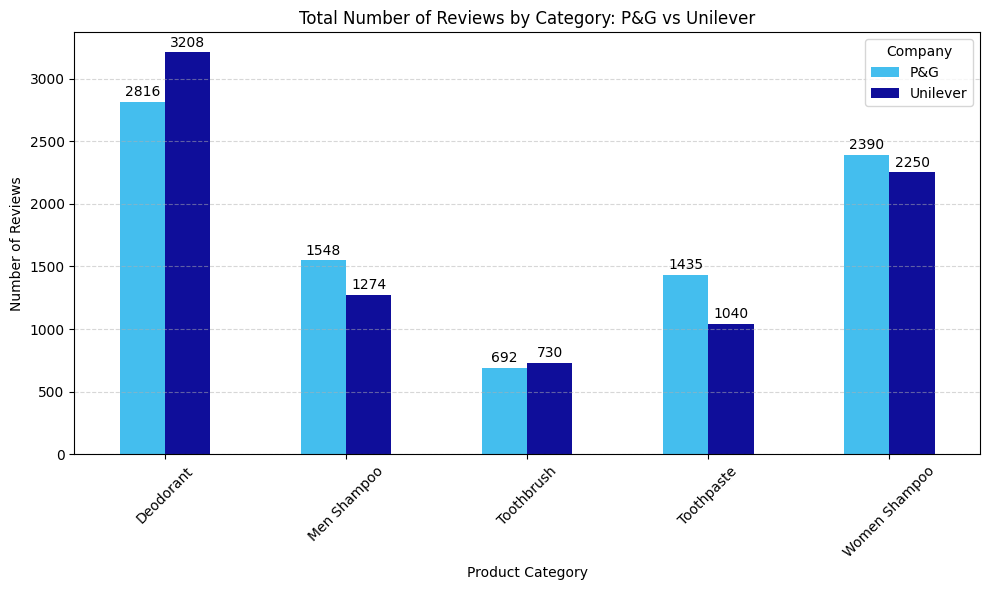

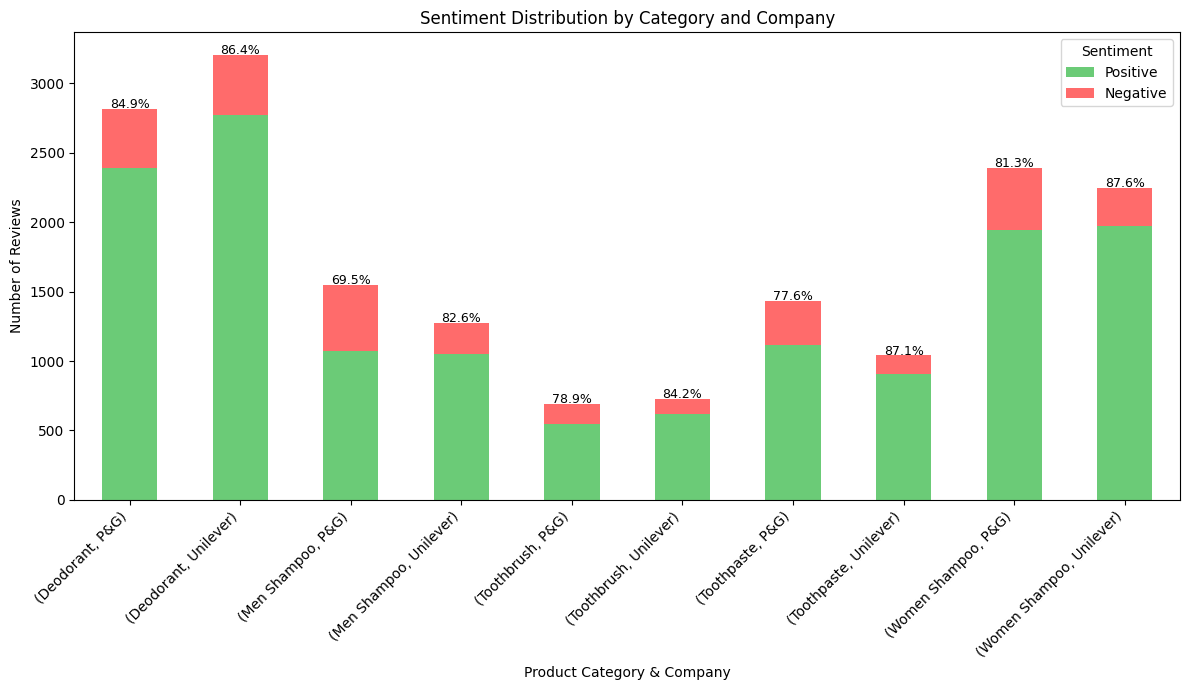

%84.9 pozitif, %15.1 negatif – Deodorant, P&G
%86.4 pozitif, %13.6 negatif – Deodorant, Unilever
%69.5 pozitif, %30.5 negatif – Men Shampoo, P&G
%82.6 pozitif, %17.4 negatif – Men Shampoo, Unilever
%78.9 pozitif, %21.1 negatif – Toothbrush, P&G
%84.2 pozitif, %15.8 negatif – Toothbrush, Unilever
%77.6 pozitif, %22.4 negatif – Toothpaste, P&G
%87.1 pozitif, %12.9 negatif – Toothpaste, Unilever
%81.3 pozitif, %18.7 negatif – Women Shampoo, P&G
%87.6 pozitif, %12.4 negatif – Women Shampoo, Unilever


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "/content/drive/MyDrive/wifo dosyalar/finalfinal_reviews.csv"
df = pd.read_csv(file_path, encoding="utf-8")

df["label_custom_model"] = df["label_custom_model"].astype("Int64").map({0: "Negative", 1: "Positive"})

# Bestimmung der Produktgruppe (nach Kategorie + Marke)
def assign_product_group(row):
    brand = row["brand_name"].lower()
    category = row["category_name"].lower()

    if "deodorant" in category:
        return "Deodorant"
    elif "şampuan" in category:
        if "clear men" in brand or "head" in brand:
            return "Men Shampoo"
        else:
            return "Women Shampoo"
    elif "fırça" in category:
        return "Toothbrush"
    elif "macun" in category:
        return "Toothpaste"
    else:
        return None

df["product_group"] = df.apply(assign_product_group, axis=1)

# Gültige Produktgruppen
valid_groups = ["Deodorant", "Men Shampoo", "Women Shampoo", "Toothbrush", "Toothpaste"]
df_grouped = df[df["product_group"].isin(valid_groups)]

# Gesamtzahl der Kommentare
total_reviews = df_grouped.groupby(["product_group", "parent_company"]).size().unstack().fillna(0)

# Sentiment Verteilung
sentiment_dist = df_grouped.groupby(["product_group", "parent_company", "label_custom_model"]).size().unstack().fillna(0)
sentiment_dist["Total"] = sentiment_dist["Positive"] + sentiment_dist["Negative"]
sentiment_dist["Positive Ratio (%)"] = (sentiment_dist["Positive"] / sentiment_dist["Total"]) * 100
sentiment_dist["Negative Ratio (%)"] = 100 - sentiment_dist["Positive Ratio (%)"]

company_colors = {
    "P&G": "#44BEEE",
    "Unilever": "#0F0E9A"
}
sentiment_colors = {
    "Positive": "#6BCB77",  # pastel yeşil
    "Negative": "#FF6B6B"   # pastel kırmızı
}

#Diagramm 1: Gesamtzahl der Kommentare
bar_colors = [company_colors.get(col, "#999999") for col in total_reviews.columns]
ax1 = total_reviews.plot(kind="bar", figsize=(10, 6), color=bar_colors)

plt.title("Total Number of Reviews by Category: P&G vs Unilever")
plt.xlabel("Product Category")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=45)
plt.legend(title="Company")
plt.grid(axis="y", linestyle="--", alpha=0.5)
for container in ax1.containers:
    ax1.bar_label(container, fmt='%.0f', label_type='edge', padding=2)
plt.tight_layout()
plt.show()

# Grafik 2: Positive/Negative Verhältnisse
sentiment_plot_data = sentiment_dist[["Positive", "Negative"]].astype(int)
ax2 = sentiment_plot_data.plot(
    kind="bar", stacked=True, figsize=(12, 7),
    color=[sentiment_colors["Positive"], sentiment_colors["Negative"]]
)

plt.title("Sentiment Distribution by Category and Company")
plt.xlabel("Product Category & Company")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Sentiment")

# positive Bewertungen
for i, (index, row) in enumerate(sentiment_dist.iterrows()):
    pos_ratio = row["Positive Ratio (%)"]
    ax2.text(i, row["Positive"] + row["Negative"] + 5, f"{pos_ratio:.1f}%", ha='center', fontsize=9, color='black')

plt.tight_layout()
plt.show()

# oranı yazdırma
for (category, company), row in sentiment_dist.iterrows():
    pos = row["Positive Ratio (%)"]
    neg = row["Negative Ratio (%)"]
    print(f"%{pos:.1f} pozitif, %{neg:.1f} negatif – {category}, {company}")


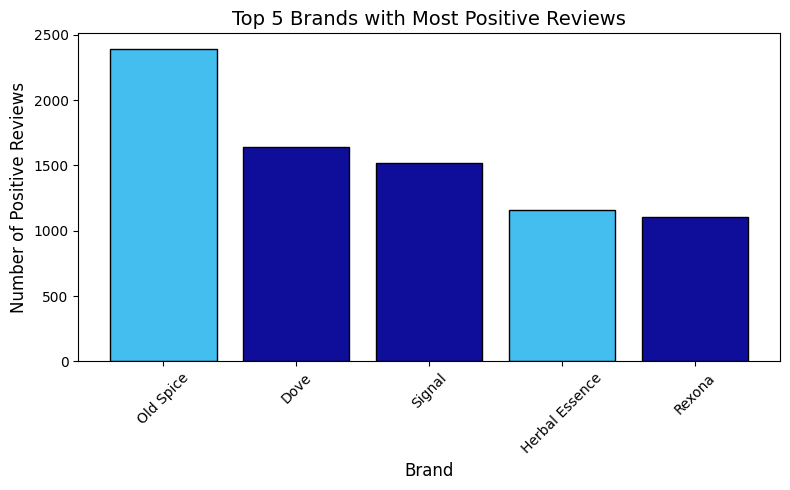

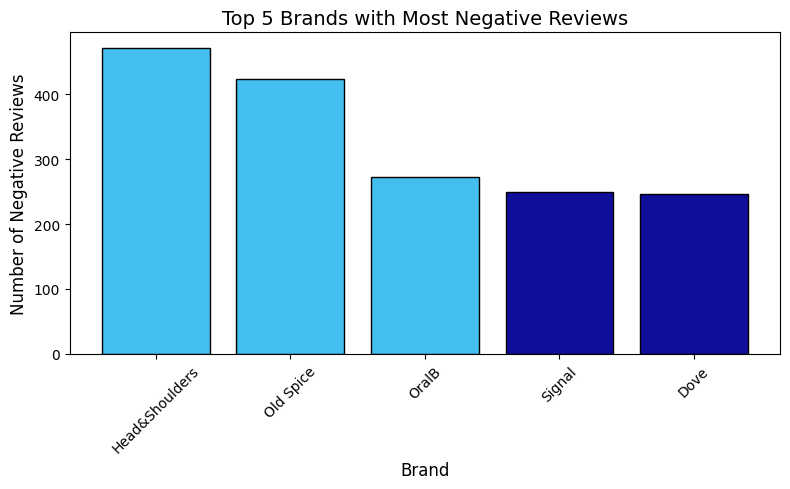

In [ ]:
import matplotlib.pyplot as plt

file_path = "/content/drive/MyDrive/wifo dosyalar/finalfinal_reviews.csv"
df = pd.read_csv(file_path, encoding="utf-8")

company_colors = {
    "P&G": "#44BEEE",
    "Unilever": "#0F0E9A",
}

# Marke → Firmenkarte
brand_company_dict = df.groupby("brand_name")["parent_company"].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else "Unknown").to_dict()

#Top 5 positiv
positive_counts = df[df["label_custom_model"] == 1]["brand_name"].value_counts().head(5)

pos_colors = [company_colors.get(brand_company_dict.get(brand, "Unknown"), "#AAAAAA") for brand in positive_counts.index]

plt.figure(figsize=(8, 5))
plt.bar(positive_counts.index, positive_counts.values, color=pos_colors, edgecolor="black")
plt.title("Top 5 Brands with Most Positive Reviews", fontsize=14)
plt.xlabel("Brand", fontsize=12)
plt.ylabel("Number of Positive Reviews", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Top 5 negativ
negative_counts = df[df["label_custom_model"] == 0]["brand_name"].value_counts().head(5)

neg_colors = [company_colors.get(brand_company_dict.get(brand, "Unknown"), "#AAAAAA") for brand in negative_counts.index]

plt.figure(figsize=(8, 5))
plt.bar(negative_counts.index, negative_counts.values, color=neg_colors, edgecolor="black")
plt.title("Top 5 Brands with Most Negative Reviews", fontsize=14)
plt.xlabel("Brand", fontsize=12)
plt.ylabel("Number of Negative Reviews", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


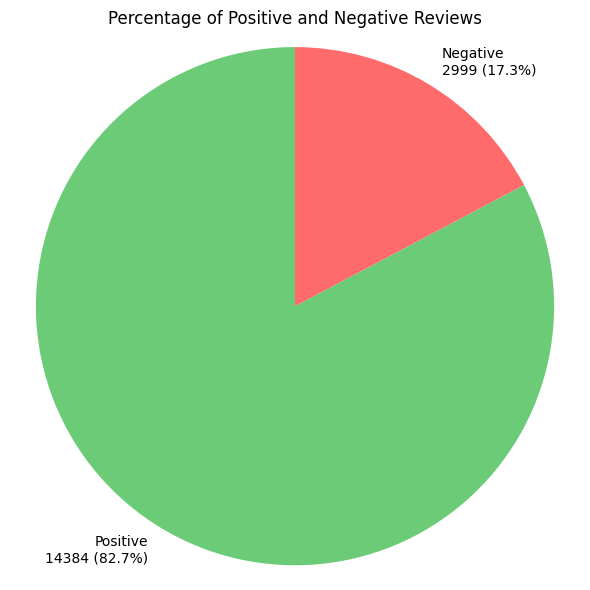

In [ ]:
##Gesamtzahl der positiven und negativen Kommentare

import pandas as pd
import matplotlib.pyplot as plt

base_drive_path = "/content/drive/MyDrive/wifo dosyalar/"
df = pd.read_csv(base_drive_path + "finalfinal_reviews.csv")

label_counts = df['label_custom_model'].value_counts()
label_percentages = label_counts / label_counts.sum() * 100

label_names = {1: 'Positive', 0: 'Negative'}
label_colors = {'Positive': '#6BCB77', 'Negative': '#FF6B6B'}

labels_named = label_counts.rename(index=label_names)
percentages_named = label_percentages.rename(index=label_names)

label_texts = [f"{label}\n{int(label_counts[i])} ({percentages_named[label]:.1f}%)" for i, label in label_names.items()]

colors = [label_colors[label] for label in label_names.values()]

plt.figure(figsize=(6, 6))
plt.pie(percentages_named, labels=label_texts, colors=colors, startangle=90)
plt.title("Percentage of Positive and Negative Reviews")
plt.axis('equal')
plt.tight_layout()
plt.show()


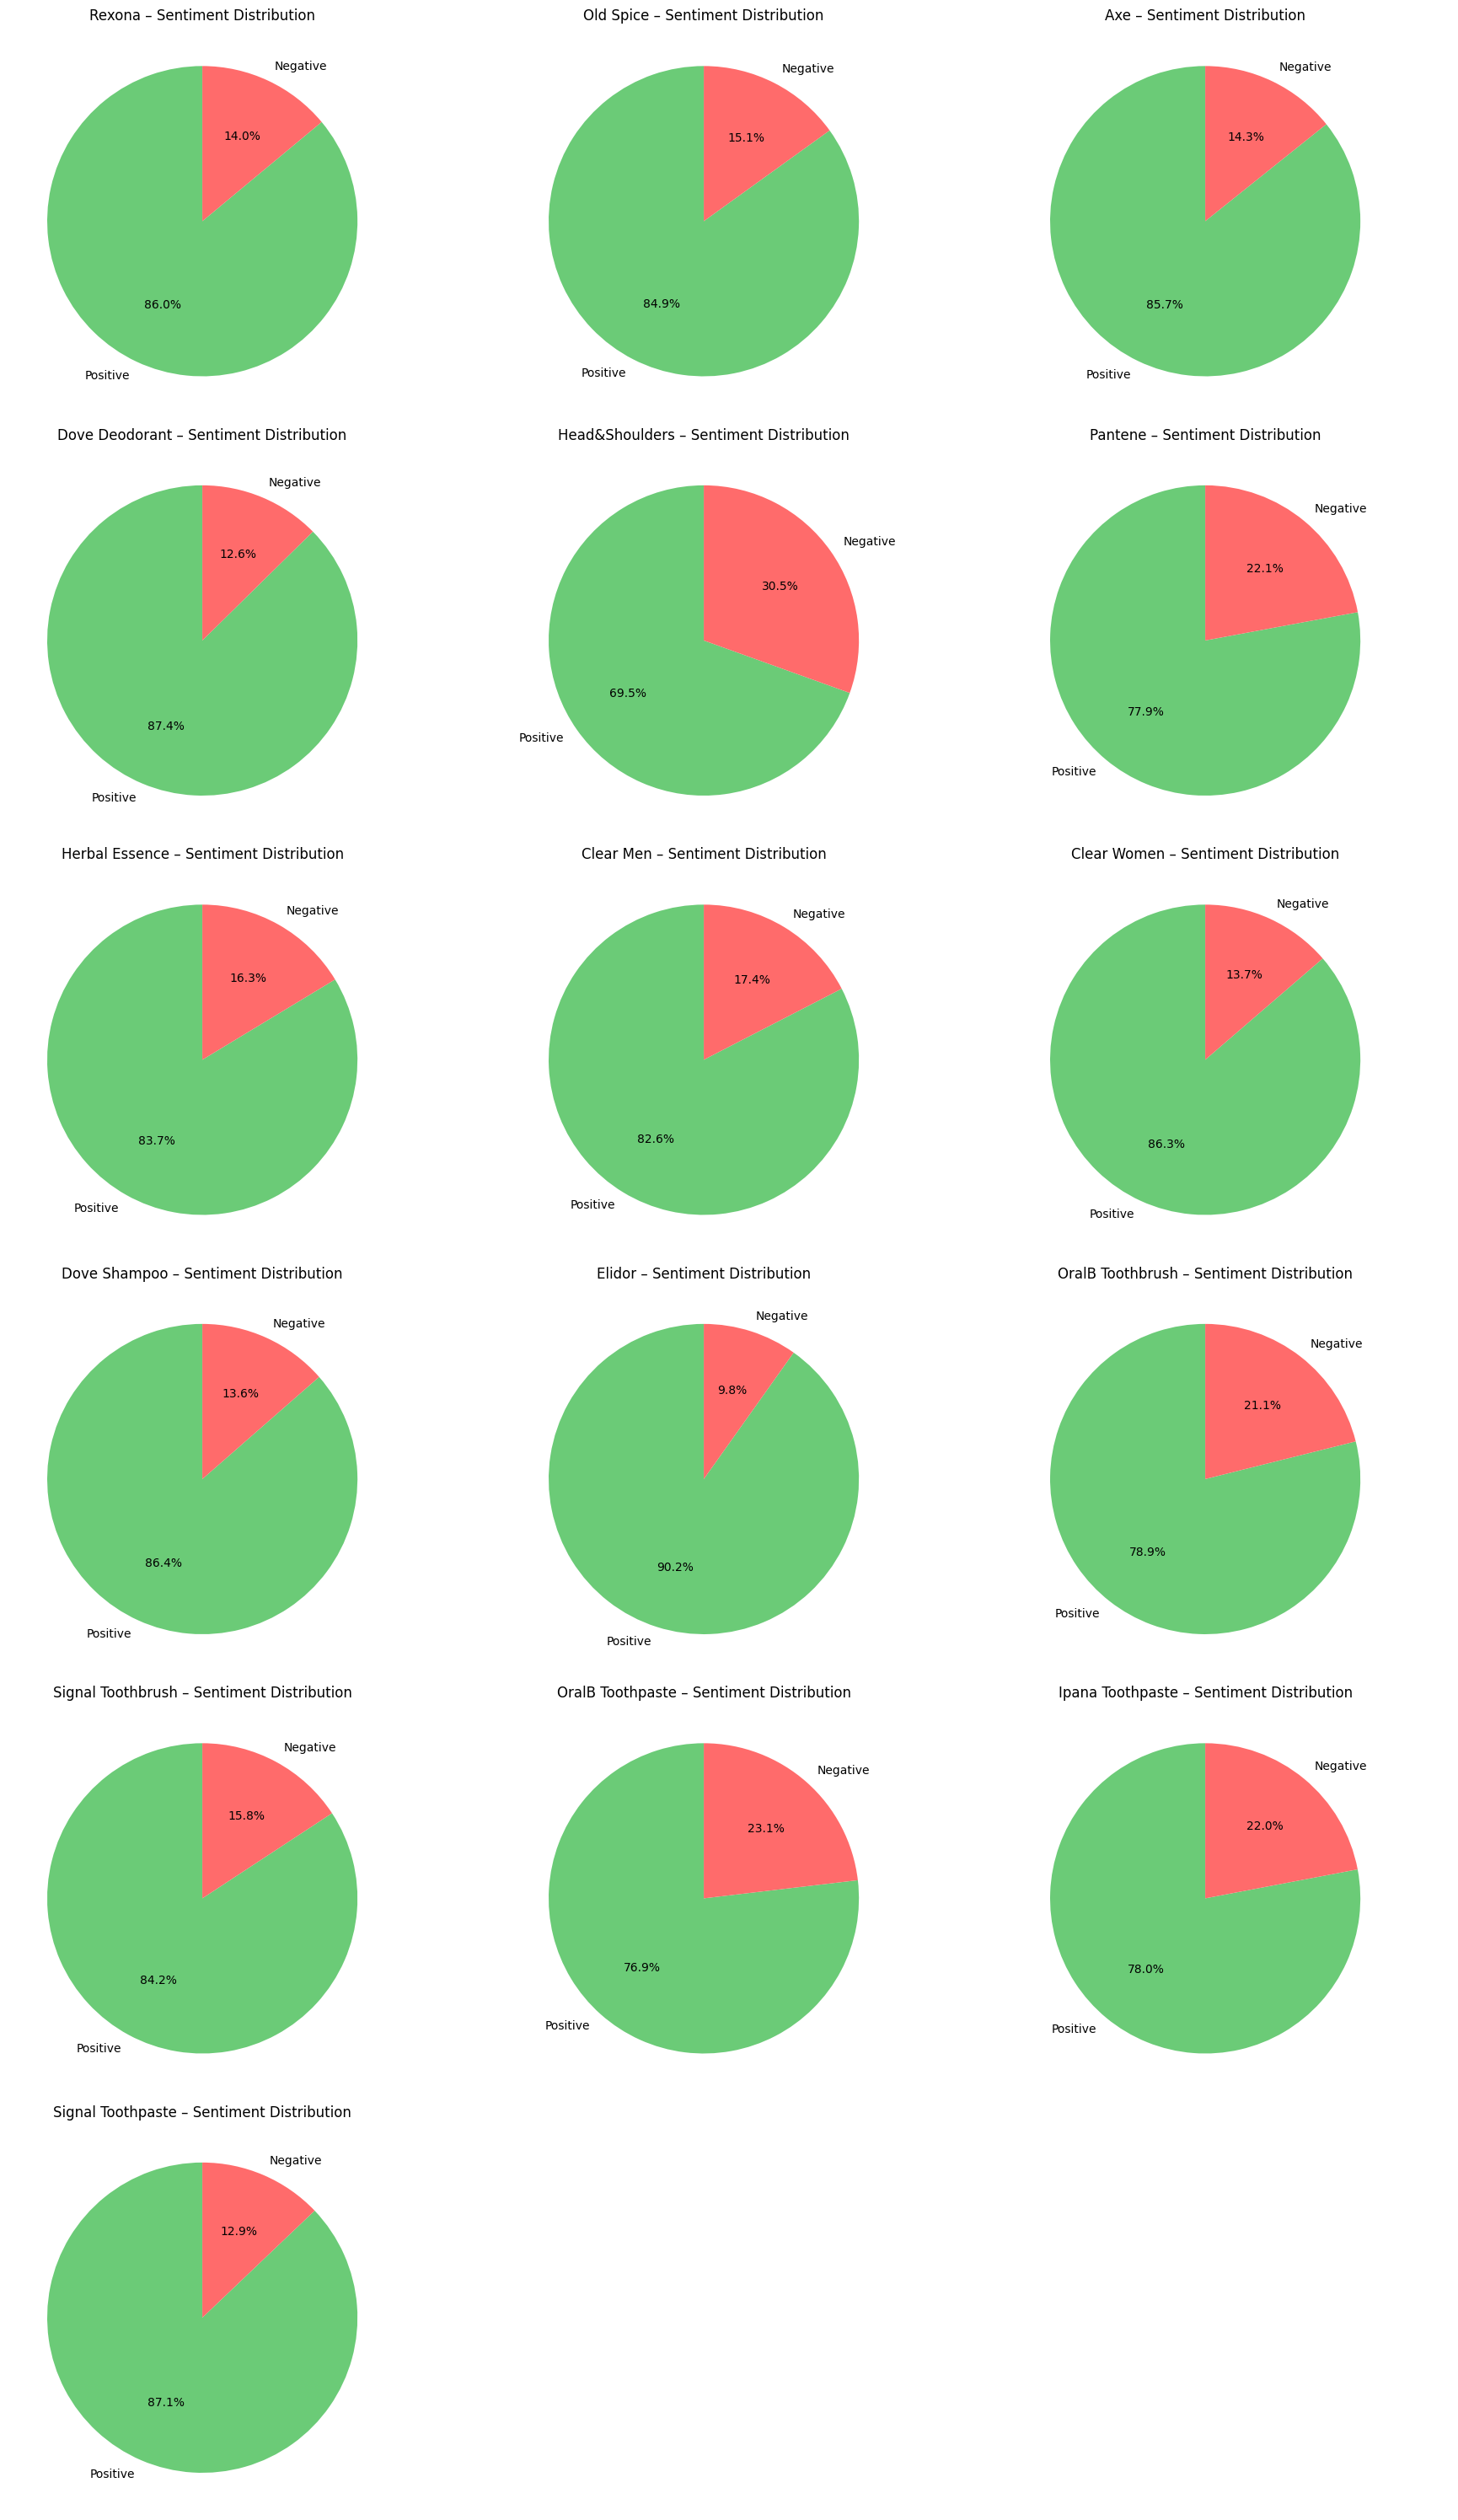

In [ ]:
## Her markanın pozitif, negtif ve nötr yorumların gözüktüğü daire grafiği


base_drive_path = "/content/drive/MyDrive/wifo dosyalar/"
df = pd.read_csv(base_drive_path + "finalfinal_reviews.csv")

sentiment_map = {0: "Negative", 1: "Positive"}
df["label_custom_model"] = df["label_custom_model"].astype("Int64").map(sentiment_map)

sentiment_colors = {
    'Positive': '#6BCB77', 'Negative': '#FF6B6B'
}

## Markenfilterung (es gibt zwei verschiedene Kategorien für Marken wie Dove)
brand_filters = {
    "Rexona": None,
    "Old Spice": None,
    "Axe": None,
    "Dove Deodorant": {"brand": "Dove", "category": "deodorant"},

    "Head&Shoulders": None,
    "Pantene": None,
    "Herbal Essence": None,
    "Clear Men": None,
    "Clear Women": None,
    "Dove Shampoo": {"brand": "Dove", "category": "şampuan"},
    "Elidor": None,

    "OralB Toothbrush": {"brand": "OralB", "category": "diş fırçası"},
    "Signal Toothbrush": {"brand": "Signal", "category": "diş fırçası"},

    "OralB Toothpaste": {"brand": "OralB", "category": "diş macunu"},
    "Ipana Toothpaste": {"brand": "Ipana", "category": "diş macunu"},
    "Signal Toothpaste": {"brand": "Signal", "category": "diş macunu"}
}

n = len(brand_filters)
cols = 3
rows = (n + cols - 1) // cols
fig, axs = plt.subplots(rows, cols, figsize=(cols * 6, rows * 5))
axs = axs.flatten()

for i, (label, condition) in enumerate(brand_filters.items()):
    ##Filtern nach Marke und Kategorie
    if condition is None:
        brand_df = df[df["brand_name"].str.lower() == label.lower()]
    else:
        brand_df = df[
            (df["brand_name"].str.lower() == condition["brand"].lower()) &
            (df["category_name"].str.lower() == condition["category"].lower())
        ]

    if brand_df.empty:
        axs[i].text(0.5, 0.5, "No data found", ha='center', va='center', fontsize=10)
        axs[i].set_title(f"{label} – No Data", fontsize=12)
        axs[i].axis('off')
        continue

    sentiment_counts = brand_df["label_custom_model"].value_counts()
    labels_list = sentiment_counts.index.tolist()
    values = sentiment_counts.values

    colors = []
    for lbl in labels_list:
        if lbl not in sentiment_colors:
            raise ValueError(f"🚨 Unknown label: '{lbl}'. Check mapping!")
        colors.append(sentiment_colors[lbl])

    # Pie chart
    axs[i].pie(values, labels=labels_list, autopct='%1.1f%%', startangle=90, colors=colors)
    axs[i].set_title(f"{label} – Sentiment Distribution", fontsize=12)

    fig_single, ax_single = plt.subplots(figsize=(6, 6))
    ax_single.pie(values, labels=labels_list, autopct='%1.1f%%', startangle=90, colors=colors)
    ax_single.set_title(f"{label} – Sentiment Distribution")
    safe_label = label.replace(" ", "_").replace("&", "and").lower()
    fig_single.savefig(f"{safe_label}_sentiment_pie.png", bbox_inches="tight")
    plt.close(fig_single)

for j in range(i + 1, len(axs)):
    axs[j].axis("off")

plt.tight_layout()
plt.show()




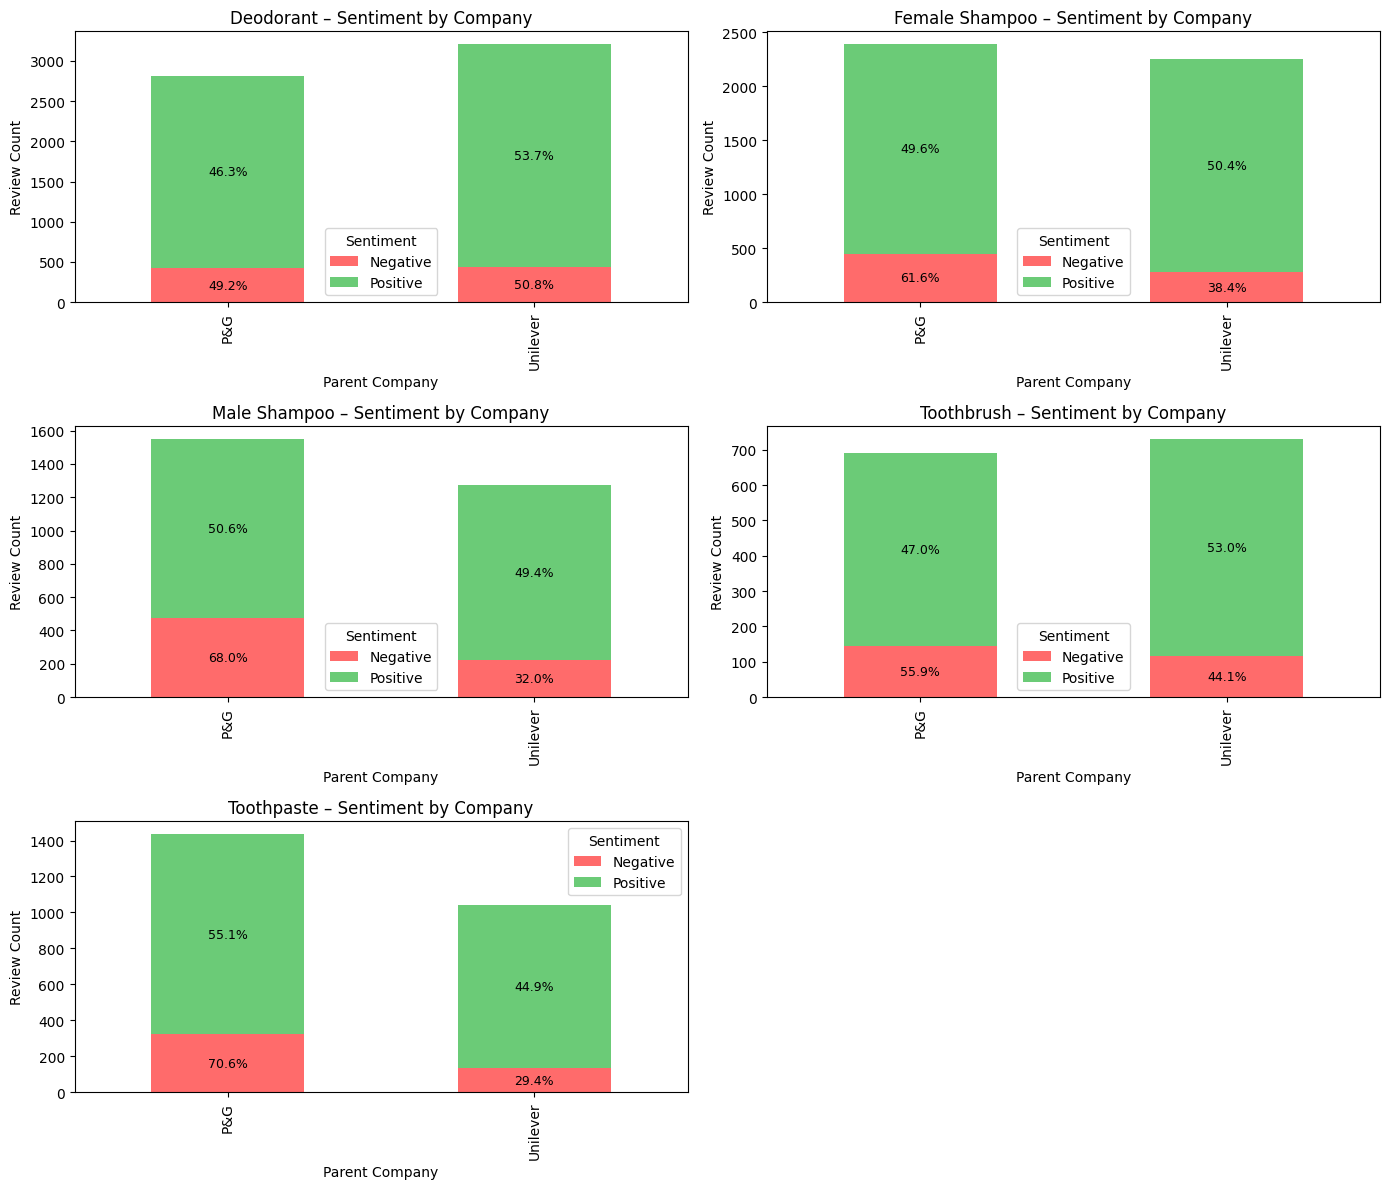

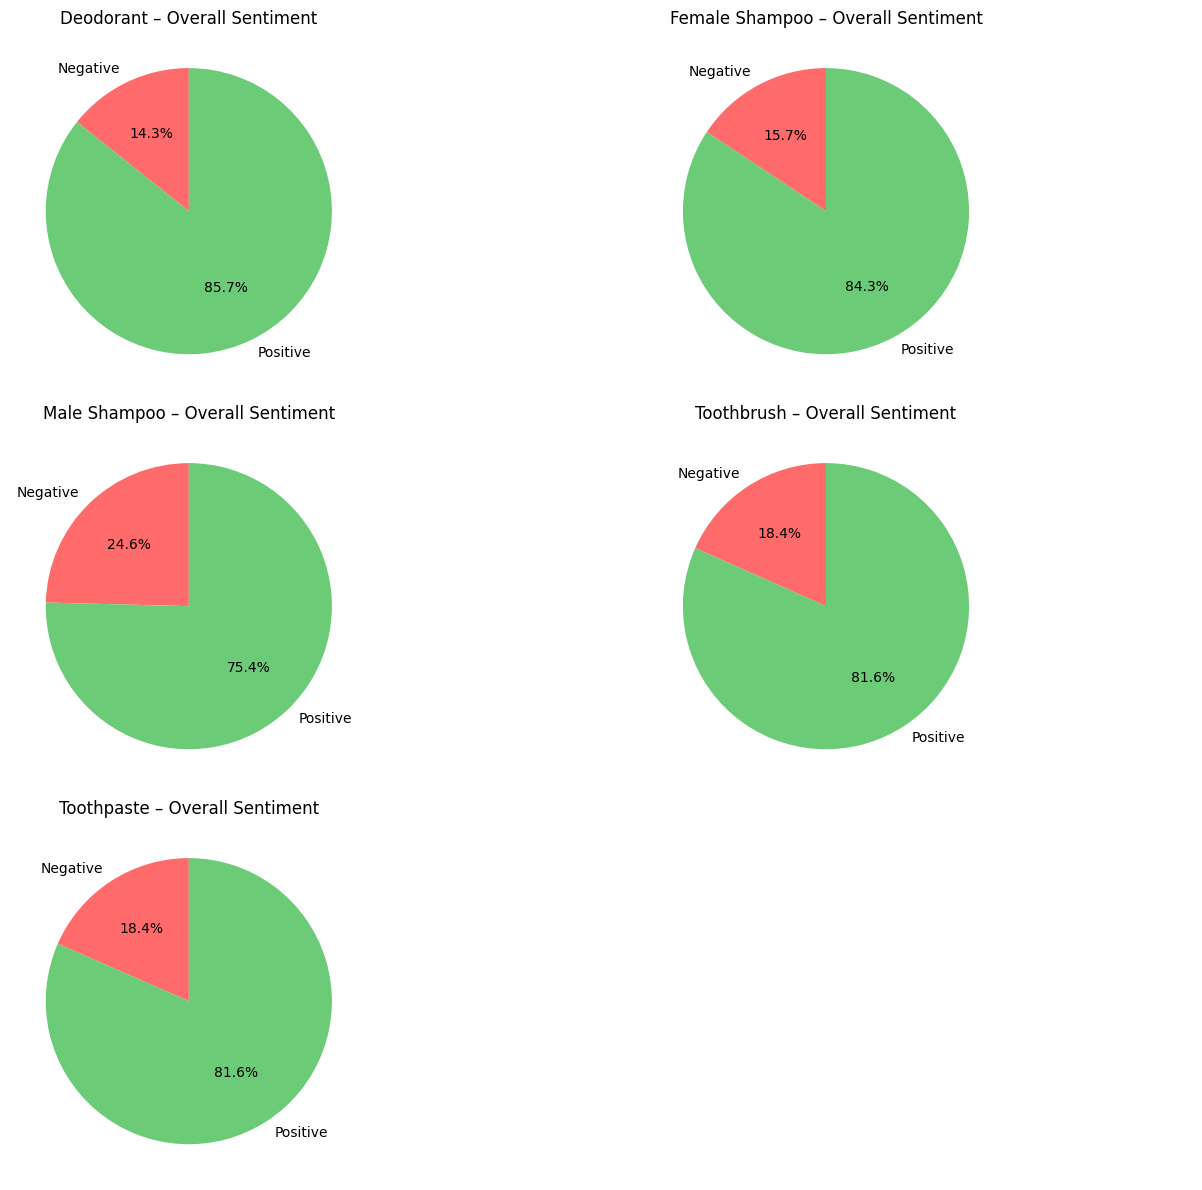

In [ ]:
#### Şimdi buraya bir bar chart yapayım bir de pie chart
### pie chart ya da bar chart olarak parent company bazlı pozitif negatif olarak yap


base_drive_path = "/content/drive/MyDrive/wifo dosyalar/"
df = pd.read_csv(base_drive_path + "finalfinal_reviews.csv")

sentiment_map = {0: "Negative", 1:"Positive"}
df["label_custom_model"] = df["label_custom_model"].astype("Int64").map(sentiment_map)

# 5 kategori için filtreler
filters = {
    "Deodorant": df[df["category_name"].str.lower() == "deodorant"],
    "Female Shampoo": df[
        (df["category_name"].str.lower() == "şampuan") &
        (df["brand_name"].isin(["Pantene", "Herbal Essence", "Dove", "Elidor", "Clear Women"]))
    ],
    "Male Shampoo": df[
        (df["category_name"].str.lower() == "şampuan") &
        (df["brand_name"].isin(["Head&Shoulders", "Clear Men"]))
    ],
    "Toothbrush": df[
        (df["category_name"].str.lower() == "diş fırçası") &
        (df["brand_name"].isin(["OralB", "Signal"]))
    ],
    "Toothpaste": df[
        (df["category_name"].str.lower() == "diş macunu") &
        (df["brand_name"].isin(["Ipana", "OralB", "Signal"]))
    ]
}

# Bar chart çizimi
fig, axs = plt.subplots(3, 2, figsize=(14, 12))
axs = axs.flatten()

for i, (cat_name, cat_df) in enumerate(filters.items()):
    group = cat_df.groupby(["parent_company", "label_custom_model"]).size().unstack().fillna(0)
    group = group[["Negative", "Positive"]]
    group.plot(kind="bar", stacked=True, ax=axs[i], color=["#FF6B6B", "#6BCB77"])
    # Yüzde etiketlerini eklemeye
    for container in axs[i].containers:
        total = sum([bar.get_height() for bar in container])
        for bar in container:
            height = bar.get_height()
            if height > 0:
                axs[i].text(
                    bar.get_x() + bar.get_width() / 2,
                    bar.get_y() + height / 2,
                    f"{height / total:.1%}",
                    ha='center', va='center', fontsize=9, color="black"
                )

    axs[i].set_title(f"{cat_name} – Sentiment by Company")
    axs[i].set_xlabel("Parent Company")
    axs[i].set_ylabel("Review Count")
    axs[i].legend(title="Sentiment")

# Son hücre boş kalabilir, onu gizle
axs[-1].axis("off")
plt.tight_layout()
plt.show()


# Pie chart
fig, axs = plt.subplots(3, 2, figsize=(14, 12))
axs = axs.flatten()

for i, (cat_name, cat_df) in enumerate(filters.items()):
    sentiment_counts = cat_df["label_custom_model"].value_counts()
    sentiment_counts = sentiment_counts.reindex(["Negative", "Positive"]).fillna(0)
    axs[i].pie(sentiment_counts.values, labels=sentiment_counts.index, autopct="%1.1f%%", startangle=90,
               colors=["#FF6B6B", "#6BCB77"])
    axs[i].set_title(f"{cat_name} – Overall Sentiment")

axs[-1].axis("off")
plt.tight_layout()
plt.show()





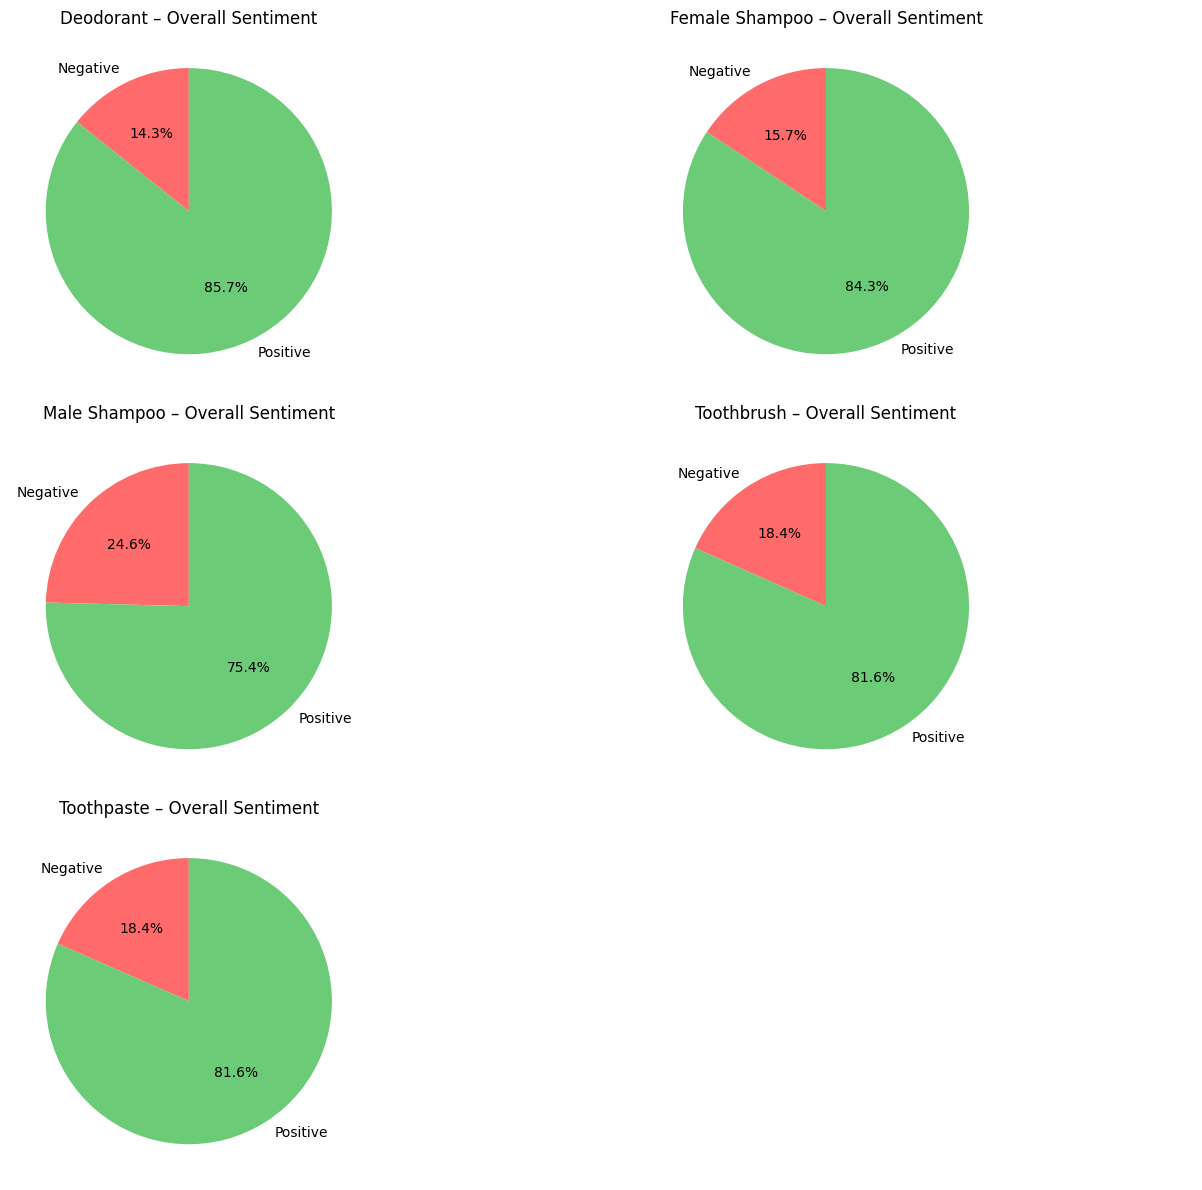

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

base_drive_path = "/content/drive/MyDrive/wifo dosyalar/"
df = pd.read_csv(base_drive_path + "finalfinal_reviews.csv")

sentiment_map = {0: "Negative", 1: "Positive"}
df["label_custom_model"] = df["label_custom_model"].astype("Int64").map(sentiment_map)

# 5 kategori için filtreler
filters = {
    "Deodorant": df[df["category_name"].str.lower() == "deodorant"],
    "Female Shampoo": df[
        (df["category_name"].str.lower() == "şampuan") &
        (df["brand_name"].isin(["Pantene", "Herbal Essence", "Dove", "Elidor", "Clear Women"]))
    ],
    "Male Shampoo": df[
        (df["category_name"].str.lower() == "şampuan") &
        (df["brand_name"].isin(["Head&Shoulders", "Clear Men"]))
    ],
    "Toothbrush": df[
        (df["category_name"].str.lower() == "diş fırçası") &
        (df["brand_name"].isin(["OralB", "Signal"]))
    ],
    "Toothpaste": df[
        (df["category_name"].str.lower() == "diş macunu") &
        (df["brand_name"].isin(["Ipana", "OralB", "Signal"]))
    ]
}

# Pie chart çizimi
fig, axs = plt.subplots(3, 2, figsize=(14, 12))
axs = axs.flatten()

for i, (cat_name, cat_df) in enumerate(filters.items()):
    sentiment_counts = cat_df["label_custom_model"].value_counts()
    sentiment_counts = sentiment_counts.reindex(["Negative", "Positive"]).fillna(0)
    axs[i].pie(sentiment_counts.values, labels=sentiment_counts.index, autopct="%1.1f%%", startangle=90,
               colors=["#FF6B6B", "#6BCB77"])
    axs[i].set_title(f"{cat_name} – Overall Sentiment")

axs[-1].axis("off")
plt.tight_layout()
plt.show()


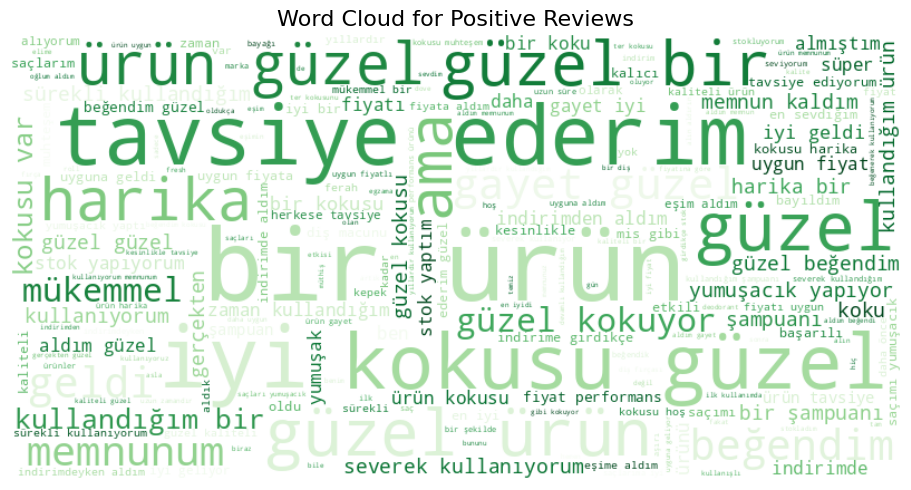

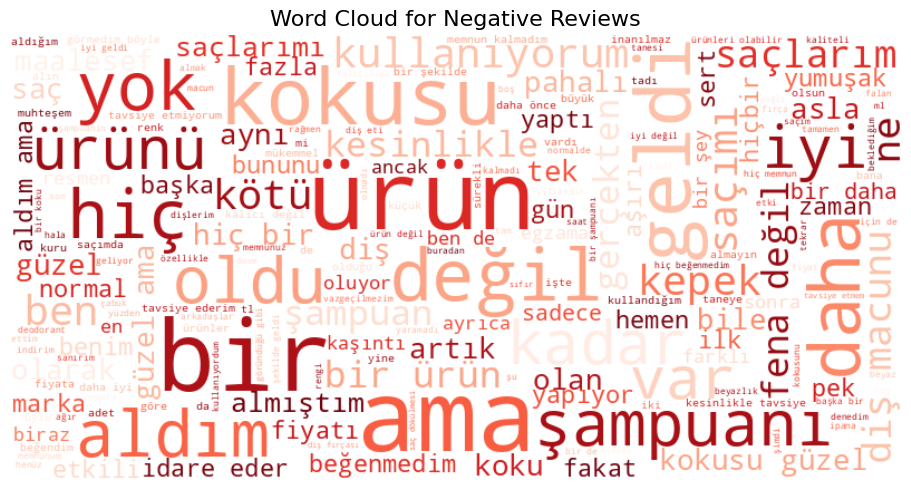

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

import pandas as pd

base_drive_path = "/content/drive/MyDrive/wifo dosyalar/"
df = pd.read_csv(base_drive_path + "finalfinal_reviews.csv")

sentiment_map = {0: "Negative", 1: "Positive"}
df["label_custom_model"] = df["label_custom_model"].astype("Int64").map(sentiment_map)

df_filtered = df[["comment_clean", "label_custom_model"]].dropna()

def draw_wordcloud(text, title, color="black"):
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color="white",
        colormap=color,
        max_words=200,
        max_font_size=90,
        contour_width=1,
        contour_color="steelblue"
    ).generate(" ".join(text))

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title, fontsize=16)
    plt.tight_layout()
    plt.show()

#Wortwolke für jedes Sentiment separat**
draw_wordcloud(
    df_filtered[df_filtered["label_custom_model"] == "Positive"]["comment_clean"],
    "Word Cloud for Positive Reviews",
    color="Greens"
)

draw_wordcloud(
    df_filtered[df_filtered["label_custom_model"] == "Negative"]["comment_clean"],
    "Word Cloud for Negative Reviews",
    color="Reds"
)



# New Section

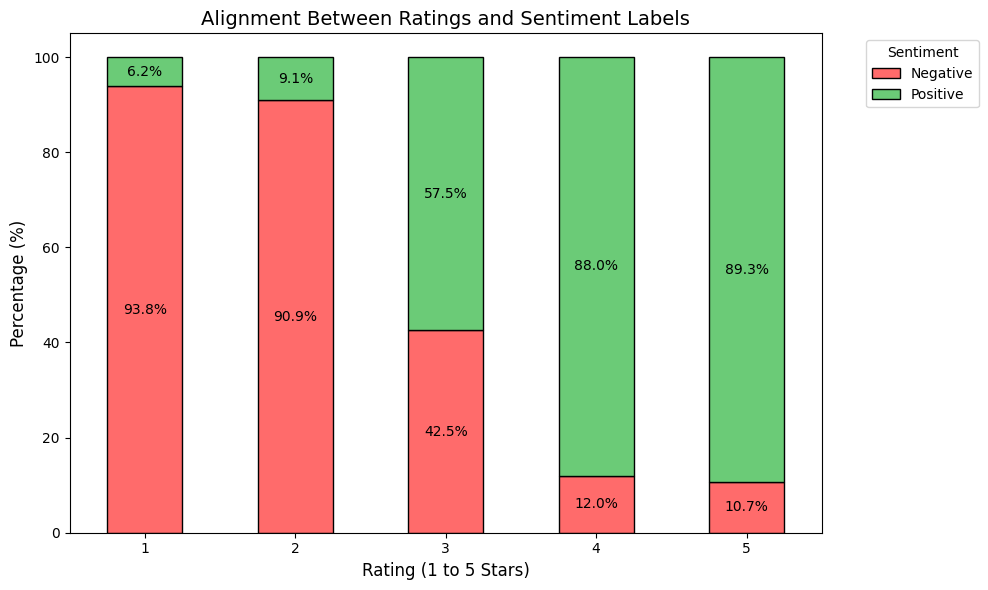

In [ ]:
###Übereinstimmung zwischen Bewertung und Sternebewertung**

import pandas as pd
import matplotlib.pyplot as plt

base_drive_path = "/content/drive/MyDrive/wifo dosyalar/"
df = pd.read_csv(base_drive_path + "finalfinal_reviews.csv")

sentiment_map = {0: "Negative", 1: "Positive"}
df["sentiment_label"] = df["label_custom_model"].map(sentiment_map)

# Sentiment-Prozentsatz nach Bewertung**
rating_sentiment_table = (
    df.groupby("comment_rating")["sentiment_label"]
    .value_counts(normalize=True)
    .unstack()
    .fillna(0) * 100
)

custom_colors = ["#FF6B6B", "#6BCB77"]  # Negative, Positive

fig, ax = plt.subplots(figsize=(10, 6))
bars = rating_sentiment_table[["Negative", "Positive"]].plot(
    kind="bar",
    stacked=True,
    ax=ax,
    color=custom_colors,
    edgecolor="black"
)


for i, (idx, row) in enumerate(rating_sentiment_table.iterrows()):
    bottom = 0
    for sentiment in ["Negative", "Positive"]:
        value = row.get(sentiment, 0)
        if value > 0:
            ax.text(i, bottom + value / 2, f"{value:.1f}%", ha="center", va="center", fontsize=10, color="black")
            bottom += value


ax.set_title("Alignment Between Ratings and Sentiment Labels", fontsize=14)
ax.set_xlabel("Rating (1 to 5 Stars)", fontsize=12)
ax.set_ylabel("Percentage (%)", fontsize=12)
ax.legend(title="Sentiment", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



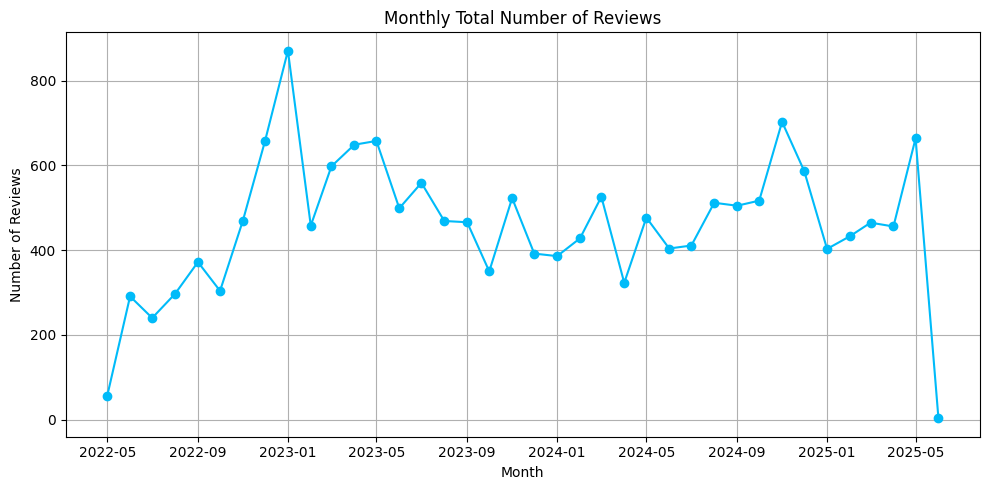

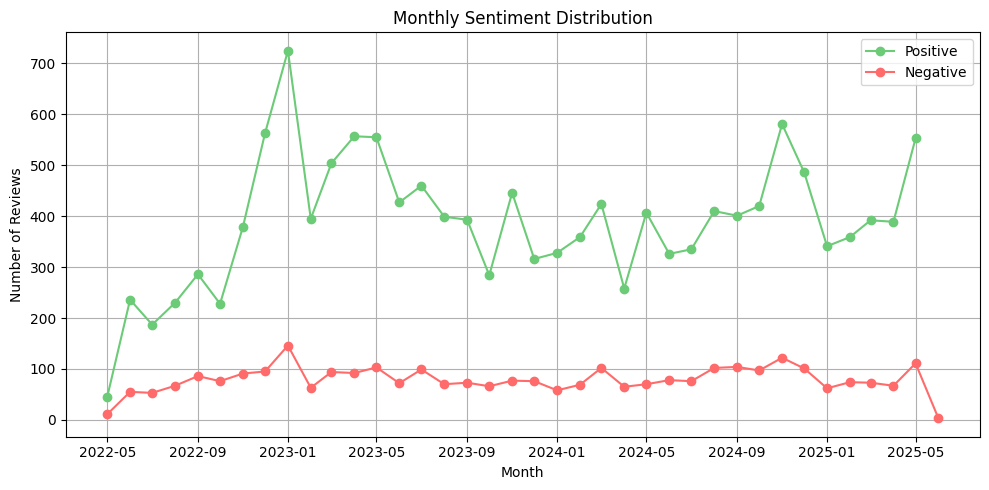

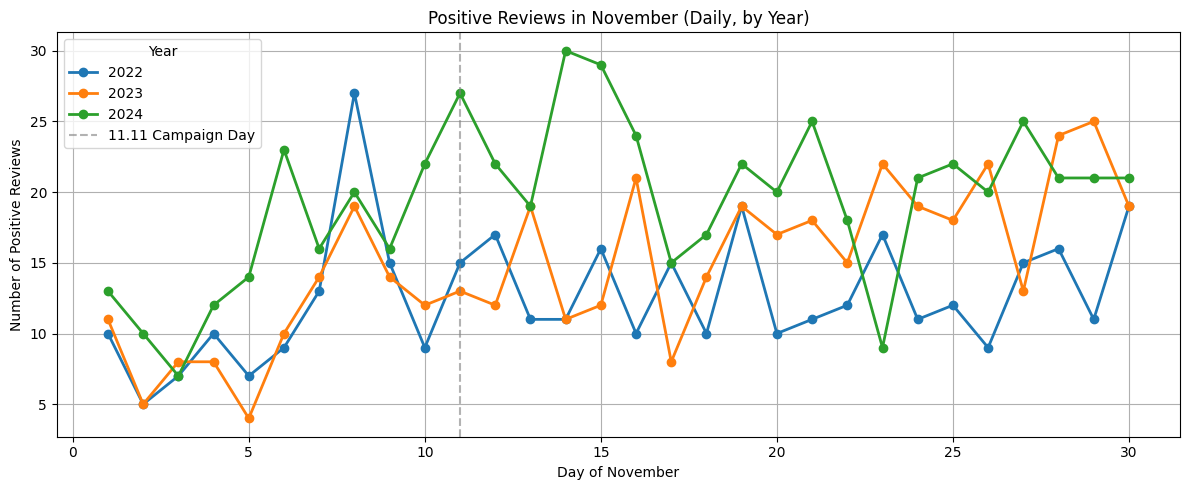

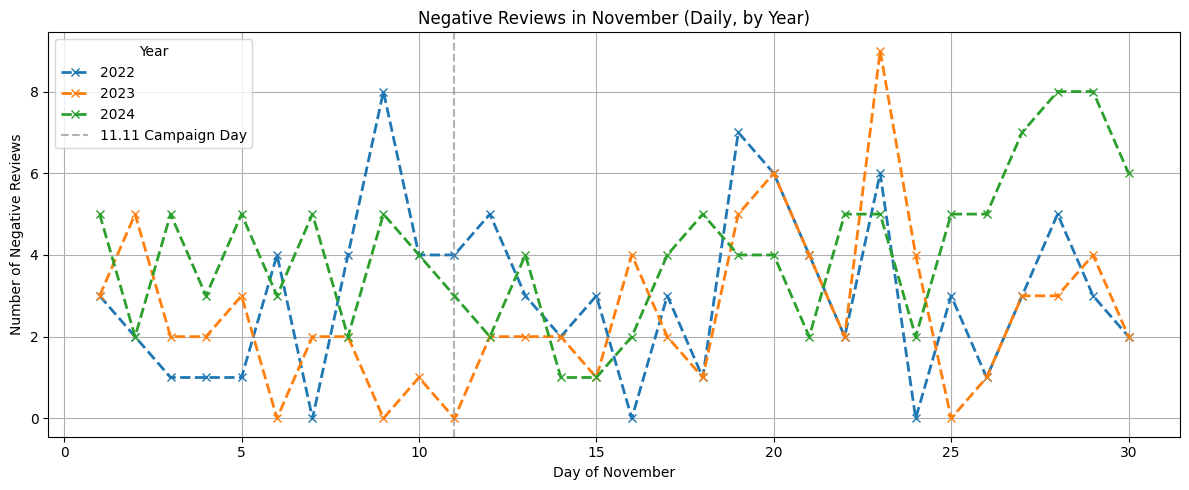

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

base_drive_path = "/content/drive/MyDrive/wifo dosyalar/"
df = pd.read_csv(base_drive_path + "finalfinal_reviews.csv")

# Türkische Monatsnamen ins Englische übersetzen
month_map = {
    "Ocak": "January", "Şubat": "February", "Mart": "March", "Nisan": "April",
    "Mayıs": "May", "Haziran": "June", "Temmuz": "July", "Ağustos": "August",
    "Eylül": "September", "Ekim": "October", "Kasım": "November", "Aralık": "December"
}

for tr, en in month_map.items():
    df["comment_date"] = df["comment_date"].str.replace(tr, en, regex=False)

# Datum in das Datetime-Format umwandeln
df["comment_date"] = pd.to_datetime(df["comment_date"], format="%d %B %Y", errors="coerce")
df = df.dropna(subset=["comment_date"])

df["comment_month"] = df["comment_date"].dt.to_period("M")
df["label_custom_model"] = df["label_custom_model"].astype("Int64")

#Monatliche Anzahl positiver und negativer Bewertungen
monthly_sentiment = (
    df.groupby(["comment_month", "label_custom_model"])
    .size()
    .unstack(level=-1)
    .reindex(columns=[0, 1], fill_value=0)
)
monthly_sentiment.index = monthly_sentiment.index.to_timestamp()

# 🔹 Aylık toplam yorum sayısı
monthly_total = df.groupby("comment_month").size()
monthly_total.index = monthly_total.index.to_timestamp()

#Monatlicher Anteil positiver Bewertungen
monthly_sentiment["positive_ratio"] = monthly_sentiment[1] / (monthly_sentiment[0] + monthly_sentiment[1]) * 100

# Monatliche Gesamtanzahl der Bewertungen
plt.figure(figsize=(10, 5))
plt.plot(monthly_total.index, monthly_total.values, marker="o", linestyle="-", color="#00BBF9")
plt.title("Monthly Total Number of Reviews")
plt.xlabel("Month")
plt.ylabel("Number of Reviews")
plt.grid(True)
plt.tight_layout()
plt.show()

#Monatliche Verteilung von positiven und negativen Bewertungen
plt.figure(figsize=(10, 5))
plt.plot(monthly_sentiment.index, monthly_sentiment[1], label="Positive", color="#6BCB77", marker="o")
plt.plot(monthly_sentiment.index, monthly_sentiment[0], label="Negative", color="#FF6B6B", marker="o")
plt.title("Monthly Sentiment Distribution")
plt.xlabel("Month")
plt.ylabel("Number of Reviews")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


##Kasım
df_kasim = df[df["comment_date"].dt.month == 11].copy()
df_kasim["year"] = df_kasim["comment_date"].dt.year
df_kasim["day"] = df_kasim["comment_date"].dt.day

# Günlük pozitif-negatif dağılım
Nov_sentiment_daily = (
    df_kasim.groupby(["year", "day"])["label_custom_model"]
    .value_counts()
    .unstack()
    .fillna(0)
    .reindex(columns=[0, 1], fill_value=0)
)

# Tägliche Sentimentverteilung im November nach Jahren
plt.figure(figsize=(12, 5))
for year in sorted(df_kasim["year"].unique()):
    daily = Nov_sentiment_daily.loc[year]
    plt.plot(daily.index, daily[1], marker="o", label=f"{year}", linewidth=2)

plt.axvline(x=11, linestyle="--", color="gray", alpha=0.6, label="11.11 Campaign Day")
plt.title("Positive Reviews in November (Daily, by Year)")
plt.xlabel("Day of November")
plt.ylabel("Number of Positive Reviews")
plt.legend(title="Year")
plt.grid(True)
plt.tight_layout()
plt.show()

# Negative Bewertungen im November (nach Jahren)
plt.figure(figsize=(12, 5))
for year in sorted(df_kasim["year"].unique()):
    daily = Nov_sentiment_daily.loc[year]
    plt.plot(daily.index, daily[0], marker="x", label=f"{year}", linestyle="--", linewidth=2)

plt.axvline(x=11, linestyle="--", color="gray", alpha=0.6, label="11.11 Campaign Day")
plt.title("Negative Reviews in November (Daily, by Year)")
plt.xlabel("Day of November")
plt.ylabel("Number of Negative Reviews")
plt.legend(title="Year")
plt.grid(True)
plt.tight_layout()
plt.show()


/tmp/ipython-input-24-2146850957.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_top_words, y="Word", x="Frequency", palette="viridis")


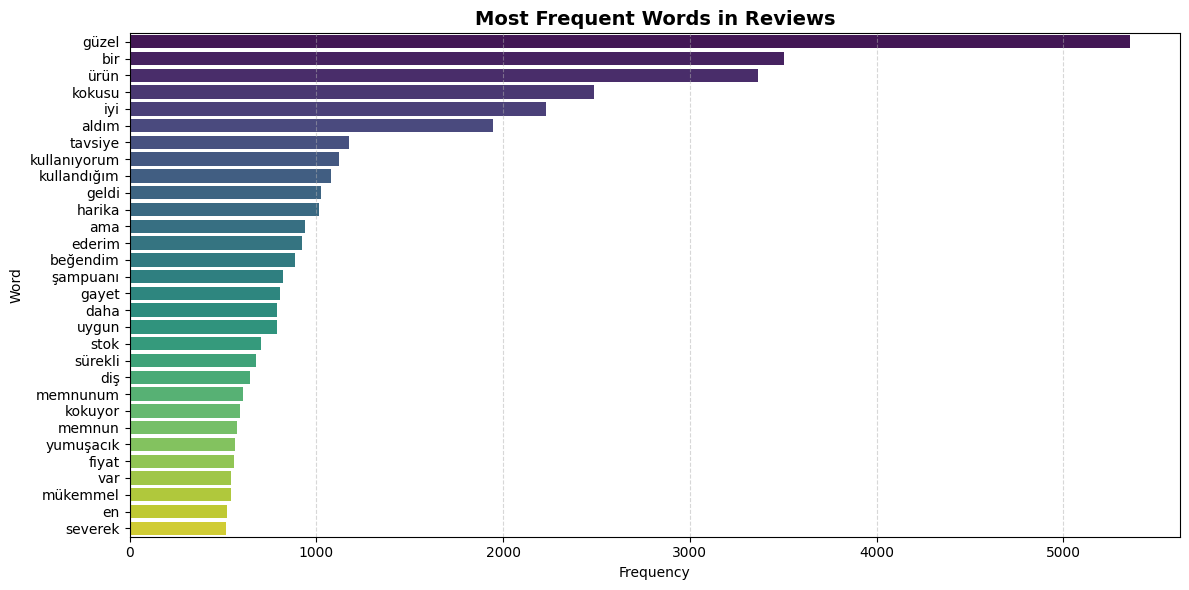

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns

# Veriyi yükle
base_drive_path = "/content/drive/MyDrive/wifo dosyalar/"
df = pd.read_csv(base_drive_path + "finalfinal_reviews.csv")

# Yorumlardaki eksik değerleri düş
comments = df["comment_clean"].dropna().astype(str)

# CountVectorizer ile kelime frekansını çıkar
vectorizer = CountVectorizer(stop_words="english")  # İngilizce stopword'leri çıkar
X = vectorizer.fit_transform(comments)
word_freq = dict(zip(vectorizer.get_feature_names_out(), X.toarray().sum(axis=0)))

# En çok geçen 30 kelimeyi al
top_words = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)[:30]
df_top_words = pd.DataFrame(top_words, columns=["Word", "Frequency"])

# Görselleştirme
plt.figure(figsize=(12, 6))
sns.barplot(data=df_top_words, y="Word", x="Frequency", palette="viridis")

plt.title("Most Frequent Words in Reviews", fontsize=14, fontweight="bold")
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


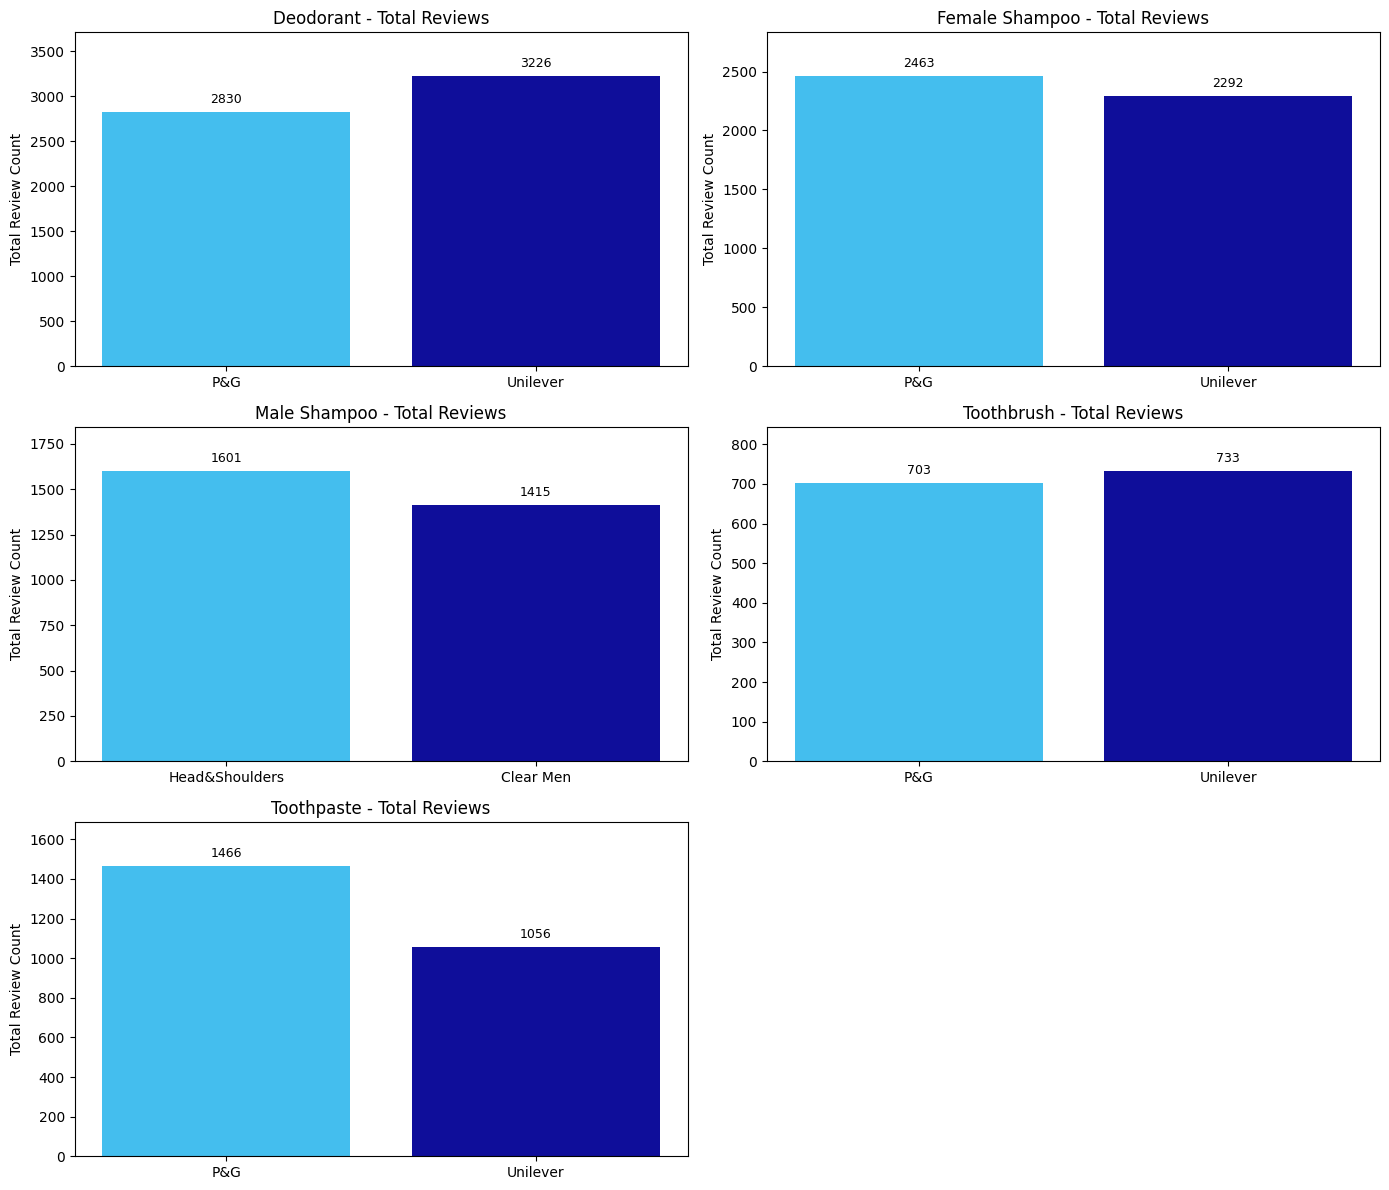

In [ ]:
import matplotlib.pyplot as plt

parent_company_colors = {"P&G": "#44BEEE", "Unilever": "#0F0E9A"}
brand_name_colors = {"Clear Men": "#0F0E9A", "Head&Shoulders": "#44BEEE"}

# Karşılaştırma verilerini oluştur
deodorant_df = df[df["category_name"].str.lower() == "deodorant"]
deodorant_cmp_total = deodorant_df.groupby("parent_company").size()

female_brands = ["Pantene", "Herbal Essence", "Clear Women", "Dove", "Elidor"]
female_df = df[
    (df["brand_name"].isin(female_brands)) &
    (df["category_name"].str.lower() == "şampuan")
]
female_cmp_total = female_df.groupby("parent_company").size()

male_brands = ["Clear Men", "Head&Shoulders"]
male_df = df[
    (df["brand_name"].isin(male_brands)) &
    (df["category_name"].str.lower() == "şampuan")
]
male_cmp_total = male_df.groupby("brand_name").size().reindex(["Head&Shoulders", "Clear Men"])

toothbrush_df = df[
    (df["brand_name"].isin(["OralB", "Signal"])) &
    (df["category_name"].str.lower() == "diş fırçası")
]
toothbrush_cmp_total = toothbrush_df.groupby("parent_company").size()

toothpaste_df = df[
    (df["brand_name"].isin(["Ipana", "OralB", "Signal"])) &
    (df["category_name"].str.lower() == "diş macunu")
]
toothpaste_cmp_total = toothpaste_df.groupby("parent_company").size()

# Ortak bar çizim fonksiyonu
def draw_total_bar(ax, data, title, color_map):
    colors = [color_map.get(key, "#BBBBBB") for key in data.index]
    ax.bar(data.index, data.values, color=colors)
    ax.set_title(title)
    ax.set_ylabel("Total Review Count")
    ax.set_ylim(0, data.max() * 1.15)
    for i, val in enumerate(data.values):
        ax.text(i, val + data.max() * 0.02, str(val), ha='center', va='bottom', fontsize=9)

#Grafik
fig, axs = plt.subplots(3, 2, figsize=(14, 12))

draw_total_bar(axs[0, 0], deodorant_cmp_total, "Deodorant - Total Reviews", parent_company_colors)
draw_total_bar(axs[0, 1], female_cmp_total, "Female Shampoo - Total Reviews", parent_company_colors)
draw_total_bar(axs[1, 0], male_cmp_total, "Male Shampoo - Total Reviews", brand_name_colors)
draw_total_bar(axs[1, 1], toothbrush_cmp_total, "Toothbrush - Total Reviews", parent_company_colors)
draw_total_bar(axs[2, 0], toothpaste_cmp_total, "Toothpaste - Total Reviews", parent_company_colors)

axs[2, 1].axis('off')
plt.tight_layout()
plt.show()


/tmp/ipython-input-16-513575693.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_influencer_df["company"] = full_influencer_df["brand_name"].map(brand_to_company)
/tmp/ipython-input-16-513575693.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10_brands.values, y=top10_brands.index, palette=brand_colors)


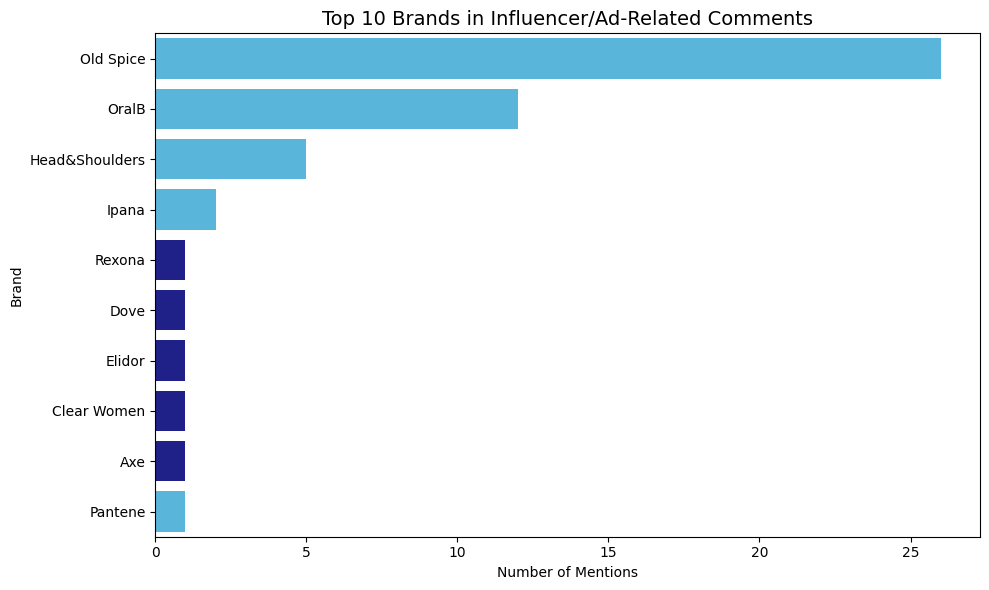

/tmp/ipython-input-16-513575693.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=company_distribution.values, y=company_distribution.index, palette=company_bar_colors)


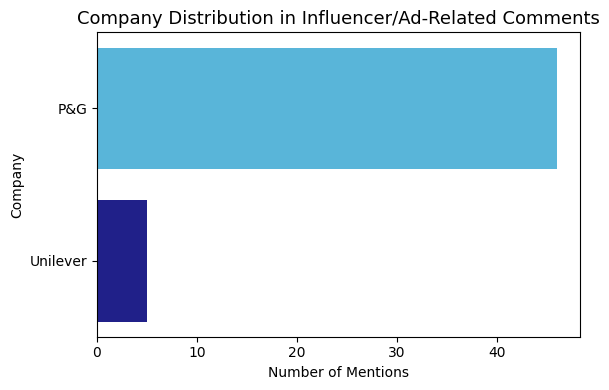

Toplam 51 yorum, sosyal medya/influencer veya reklam etkisi taşıyor.


In [ ]:
# Geniş influencer + reklam etkili ifadeler listesi
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

base_drive_path = "/content/drive/MyDrive/wifo dosyalar/"
df = pd.read_csv(base_drive_path + "finalfinal_reviews.csv")

# 1. Anahtar kelimeleri belirle
influencer_keywords = [
    r"\böneri\b", r"\bönerisi\b", r"\bönerdi\b", r"gördüm aldım",
    r"\bcago\b", r"\bjahrein\b", r"\big\b", r"gördüm"
    r"\bsosyal medyadan\b", r"\bsosyal medyada\b",
    r"\breklam\b", r"\breklamlarda\b", r"\breklamada\b"
]

# 2. Hepsini tek regex'e çevir
influencer_pattern = "|".join(influencer_keywords)

# 3. Bu yorumları filtrele
full_influencer_df = df[df["comment_clean"].str.contains(influencer_pattern, case=False, na=False)]

# 4. Marka → Şirket eşlemesi oluştur
brand_to_company = df.groupby("brand_name")["parent_company"].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else "Unknown").to_dict()
full_influencer_df["company"] = full_influencer_df["brand_name"].map(brand_to_company)

# 5. Sayım
top10_brands = full_influencer_df["brand_name"].value_counts().head(10)
company_distribution = full_influencer_df["company"].value_counts()

# 6. Renk eşleşmesi
company_colors = {
    "P&G": "#44BEEE",
    "Unilever": "#0F0E9A"
}
brand_colors = [company_colors.get(brand_to_company.get(brand, "Unknown"), "#AAAAAA") for brand in top10_brands.index]
company_bar_colors = [company_colors.get(comp, "#AAAAAA") for comp in company_distribution.index]

# 7. Grafik: Top 10 Marka
plt.figure(figsize=(10, 6))
sns.barplot(x=top10_brands.values, y=top10_brands.index, palette=brand_colors)
plt.title("Top 10 Brands in Influencer/Ad-Related Comments", fontsize=14)
plt.xlabel("Number of Mentions")
plt.ylabel("Brand")
plt.tight_layout()
plt.show()

# 8. Grafik: Şirket Dağılımı
plt.figure(figsize=(6, 4))
sns.barplot(x=company_distribution.values, y=company_distribution.index, palette=company_bar_colors)
plt.title("Company Distribution in Influencer/Ad-Related Comments", fontsize=13)
plt.xlabel("Number of Mentions")
plt.ylabel("Company")
plt.tight_layout()
plt.show()

# 9. Toplam yorum sayısını bildir
print(f"Toplam {full_influencer_df.shape[0]} yorum, sosyal medya/influencer veya reklam etkisi taşıyor.")


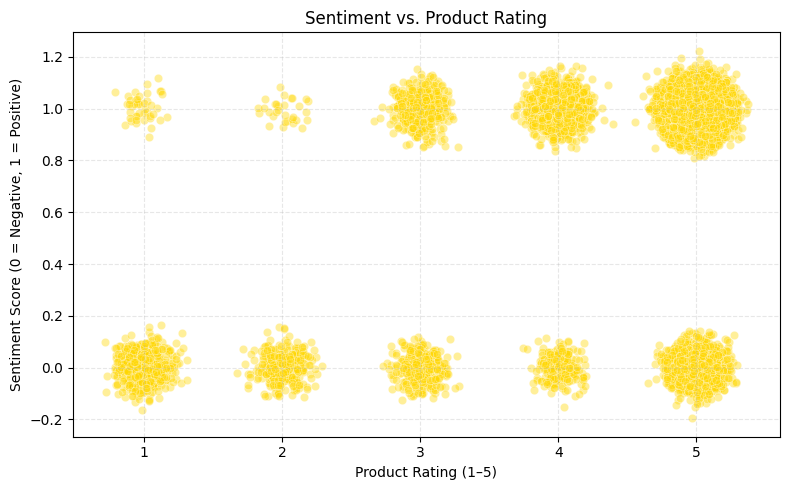

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

base_drive_path = "/content/drive/MyDrive/wifo dosyalar/"
df = pd.read_csv(base_drive_path + "finalfinal_reviews.csv")

df_valid = df[df["label_custom_model"].isin([0.0, 1.0]) & df["comment_rating"].between(1, 5)]

# Jitter ekle
np.random.seed(42)
jittered_sentiment = df_valid["label_custom_model"] + np.random.normal(0, 0.05, size=len(df_valid))
jittered_rating = df_valid["comment_rating"] + np.random.normal(0, 0.1, size=len(df_valid))

# Scatter plot – altın sarısı (#FFD700)
plt.figure(figsize=(8, 5))
sns.scatterplot(
    x=jittered_rating,
    y=jittered_sentiment,
    color="#FFD700",
    alpha=0.4
)

plt.title("Sentiment vs. Product Rating")
plt.xlabel("Product Rating (1–5)")
plt.ylabel("Sentiment Score (0 = Negative, 1 = Positive)")
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


In [ ]:
## 2.cleaning
import pandas as pd
import re


base_drive_path = "/content/drive/MyDrive/wifo dosyalar/"
df = pd.read_csv(base_drive_path + "final_reviews2.csv")
ids_to_delete = [
    459, 1060, 2604, 2617, 2618, 2895, 931, 1287, 1493, 1587, 1863, 2104, 2301,
    9016, 9042, 9054, 9125, 9216, 9233, 9369, 9410, 9587, 9596, 9600, 9726,
    10059, 10070, 10075, 10079, 10081, 3215, 4347, 4348, 4349, 4366, 4393,
    4829, 4929, 5081, 5090, 5091, 5092, 6291, 6327, 6586, 6636, 6683, 6686,
    6691, 6695, 6700, 6701, 6705, 7012, 7225, 7227, 7231, 7238, 7240, 7242,
    8784, 8788, 8789, 8790, 8801, 8803, 8923, 8935, 8775, 8776, 8778, 8779,
    8781, 8782, 8783, 7247, 7250, 7254, 7256, 7263, 7264, 7265, 7269, 7276,
    7287, 8749, 8750, 8751, 8752, 8759, 8760, 8761, 8762, 8763, 8769, 7294,
    7295, 7296, 7312, 7322, 7324, 7447, 7551, 7554, 7555, 7559, 7732, 7741,
    7746, 7748, 7757, 7761, 8003, 10519, 10819, 11189, 11199, 11202, 11205,
    11348, 11496, 11551, 11807, 11818, 12317, 12483, 12519, 13070, 13400,
    13542, 13947, 13948, 13960, 13964, 13967, 13968, 14015, 14167, 14174,
    14208, 14210, 14213, 14214, 14219, 14252, 14272, 14859, 14874, 14875,
    14877, 14878, 14879, 14911, 15435, 15401, 15416, 15417, 15418, 15421,
    15426, 15921, 15942, 15945, 15949, 15950, 15983, 16678, 16683, 16684,
    16724, 16759, 17026, 18527, 18551, 18553, 18554, 18572, 18576, 18590,
    18615, 18625, 18794, 18868, 19239, 19312, 19387, 20029, 20441, 20552,
    20714, 21571, 21583, 21584, 21598, 21637, 21645, 21656, 21675, 21692,
    21702, 21704, 21706, 21708, 21709, 21792, 21877, 21880, 21882, 21887,
    21890, 21891, 21896, 21903, 21954, 21955, 21985, 21986, 21989, 22056,
    22254, 22287, 22546, 22582, 22588, 22812, 22815, 22897, 22921, 22927,
    23047, 23126, 23328, 24705, 25120, 25121, 25347, 25355, 25428, 25430,
    25448, 25464, 25502, 25496, 25499, 25510, 25511, 25532, 25533, 25534,
    25542, 25547, 25553, 25557, 25558, 25559, 25560, 25561, 25562, 25563,
    25564, 25567, 25568, 25569, 25570, 25571, 25572, 25573, 25574, 25575,
    25576, 25577, 25578, 25580, 25581, 25582, 25583, 25584, 25585, 25587,
    25588, 25589, 25592, 25595, 25596, 25598, 25601, 25603, 25646, 25647,
    25648, 25649, 25655, 25667, 25670, 25671, 25681, 25682, 25683, 25685,
    25687, 25693, 25698, 25699, 25700, 25703, 25706, 25708, 25709, 25710,
    25712, 25713, 25714, 25716, 25717, 25726, 25727, 25728, 25729, 25734,
    25735, 25736, 25737, 25738, 25743, 25744, 25745, 25746, 25754, 25755,
    25756, 25757, 25761, 25763, 25764, 25765, 25766, 25767, 25768, 25770,
    25771, 25772, 25775, 25776, 25777, 25778, 25779, 25781, 25782, 25783,
    25784, 25787, 25789, 25795, 25801, 25846, 25971, 25957, 25958, 25606,
    25607, 25608, 25609, 25610, 25611, 25612, 25613, 25614, 25615, 25616,
    25617, 25618, 25619, 25620, 25621, 25622, 25623, 25624, 25625, 25626,
    25627, 25628, 25629, 25630, 25631, 25632, 25633, 25718, 25719, 25720,
    25721, 25722, 25723
]
df = df[~df["id"].isin(ids_to_delete)]

# 2. Belirli kelimeleri yorumdan sil (custom stopwords)
custom_stopwords = [
    "azerbeycan", "Azerbeycan", "replika", "orijinal", "paketlenmiş", "özenli",
    "sapa", "sağlam", "sapasağlam", "ulaştı", "fotoğraftaki", "gözüktüğü",
    "skt", "sarılmış", "eyvallah", "kırık"
]
pattern = r'\b(' + '|'.join(map(re.escape, custom_stopwords)) + r')\b'
df["comment_clean"] = df["comment_clean"].str.replace(pattern, "", regex=True)
df["comment_clean"] = df["comment_clean"].str.replace(" +", " ", regex=True).str.strip()

# 🔹 3. "gelmedi" geçen yorumları tamamen sil
df = df[~df["comment_clean"].str.contains(r"\bgelmedi\b", case=False, na=False)]

# 🔹 4. Boş kalan comment_clean satırlarını da sil
df = df[df["comment_clean"].str.strip().astype(bool)]

df = df.drop_duplicates("id")

## kaydet
csv_path = base_drive_path + "finalfinal_reviews.csv"
df.to_csv(csv_path, index=False)
